### M2: Feature Engineering & Explainability

#### Objective: Build a feature engineering pipeline with explainability visualizations.

Tasks:

**Feature Engineering:**
 - Implement preprocessing steps such as normalization, scaling, or transformations.

In [2]:
!pip install shap tensorflow matplotlib scikit-learn

#### Step 1: Load and Explore the Data

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


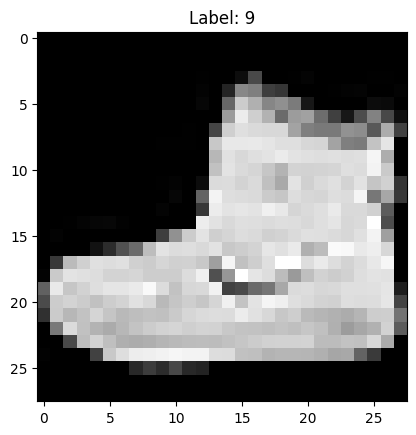

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Explore the dataset
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Display a sample image
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

#### Step 2: Preprocessing and Feature Engineering

In [20]:
from sklearn.preprocessing import MinMaxScaler

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
    
# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images for a simple model input
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Standardize features by removing the mean and scaling to unit variance
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

print("Scaled training set shape:", X_train_scaled.shape)

Scaled training set shape: (60000, 784)


#### Step 3: Build a Simple Model

In [21]:
import tensorflow as tf
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=5, batch_size=64, verbose=1)

# Evaluate the model
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)

# Print the accuracy of the model on the test set
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/5


/Users/rijumone/Kitchen/dot-edu/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.7632 - loss: 0.6956
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - accuracy: 0.8646 - loss: 0.3779
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - accuracy: 0.8750 - loss: 0.3356
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step - accuracy: 0.8849 - loss: 0.3147
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - accuracy: 0.8909 - loss: 0.2931
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 392us/step - accuracy: 0.8659 - loss: 0.3703
Test Accuracy: 86.60%


**Explainability:**
- Use an open-source explainability library (e.g., SHAP, LIME, or InterpretML) to illustrate how each feature affects the class.
- Use insights from explainability to refine the feature engineering pipeline.

PermutationExplainer explainer: 1001it [10:41,  1.54it/s]                          
/var/folders/8s/cgfskf4s08sf0wtns9byv36r0000gn/T/ipykernel_69347/1745501264.py:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train[:100])


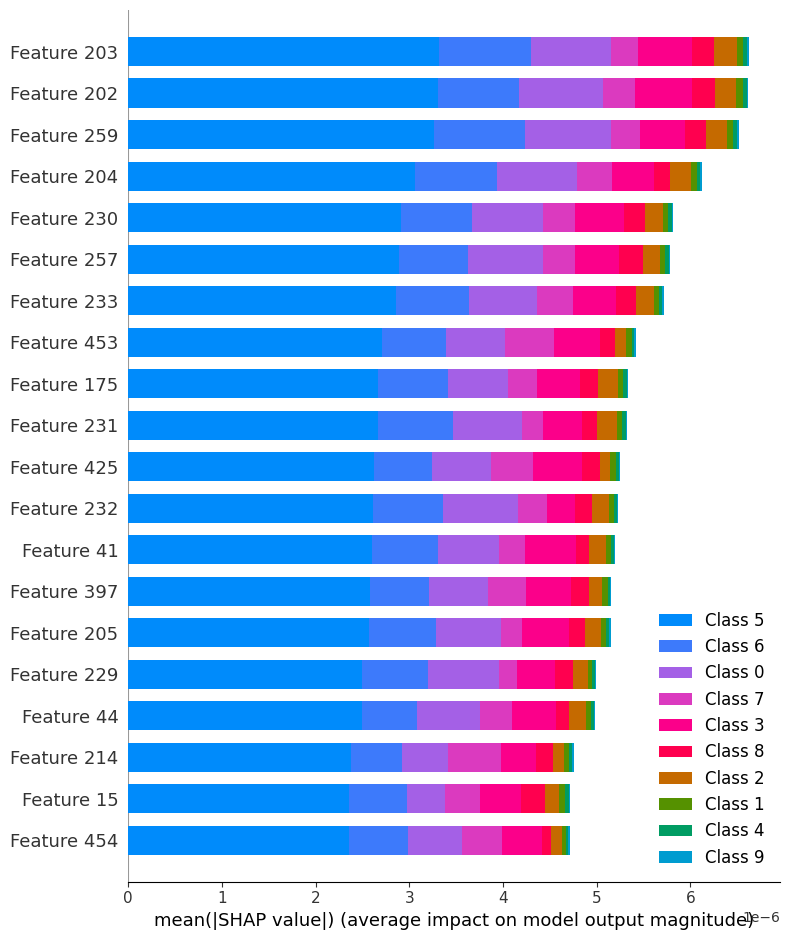

In [25]:
import shap

explainer = shap.Explainer(model, X_train[:10000])  # Use a subset for efficiency
shap_values = explainer(X_train[:1000], max_evals=2000)  # Increase max_evals

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train[:100])

1. **Feature Importance Ranking**  
   - Features are ranked by their mean absolute SHAP values, indicating their overall impact on the model’s predictions.  
   - The top features (e.g., Feature 203, Feature 202, Feature 259) contribute the most to the model’s decision-making process.

2. **Class-Specific Contributions**  
   - Different colors represent different classes, showing how each feature affects predictions across multiple output classes.  
   - Features with a balanced or strong influence across multiple classes are likely to be more informative.

3. **Magnitude of SHAP Values**  
   - The longer the bar, the more significant the feature is in affecting predictions.  
   - Features with higher SHAP values are prioritized for their predictive power.

4. **Feature Redundancy Check**  
   - If some features have similar importance and effects, dimensionality reduction techniques can be considered.

### Next Steps  
- If feature selection is needed for optimization, lower-ranked features can be removed to improve computational efficiency.  
- If interpretability is a priority, further exploration into specific features and their influence on classes can provide deeper insights.